The primary aim of this research is to utilize Partial Dependence Plots and Feature Importance techniques for interpreting a range of models. Our approach involves starting with simpler models and gradually advancing to more complex ones, enabling a comprehensive assessment of the AI's decision-making process interpretability. Through experimentation across diverse real-world datasets, we aim to evaluate the strengths and limitations of these methods, shedding light on their effectiveness in various scenarios.
Our methodology starts with simulations, allowing us to evaluate these interpretability methods comprehensively. After analyzing the outcomes and gaining insights from these simulations, we plan to extend our approach to real-world datasets. This sequential process enables us to transfer the knowledge acquired from simulations and effectively apply it to practical scenarios, thereby enhancing our understanding of these interpretability methods across different datasets.

R-squared score: 0.9166
RMSE: 0.5317


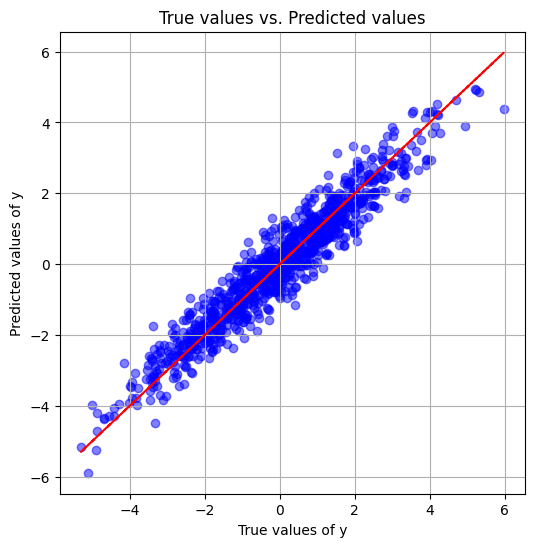

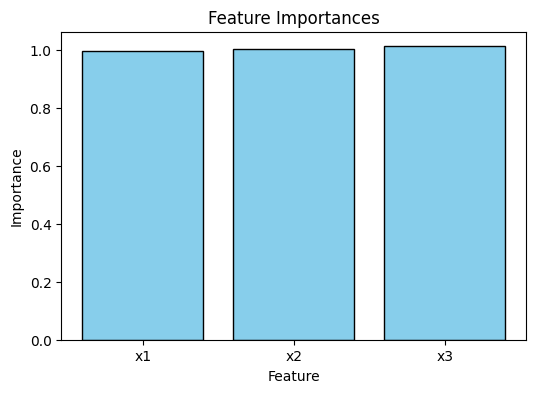

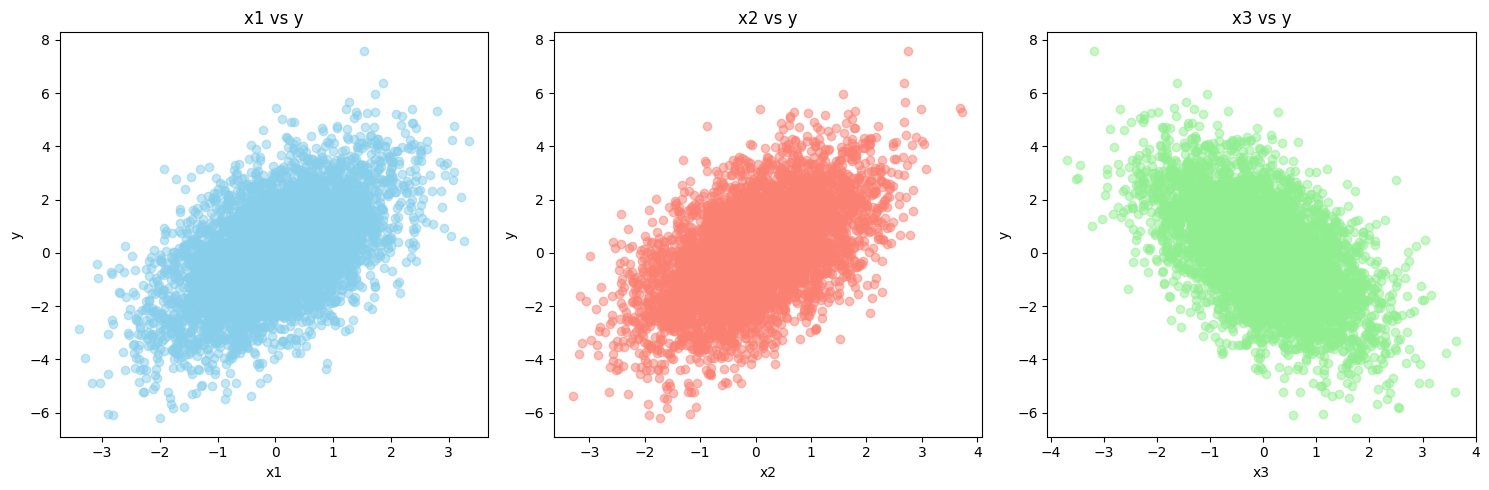

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


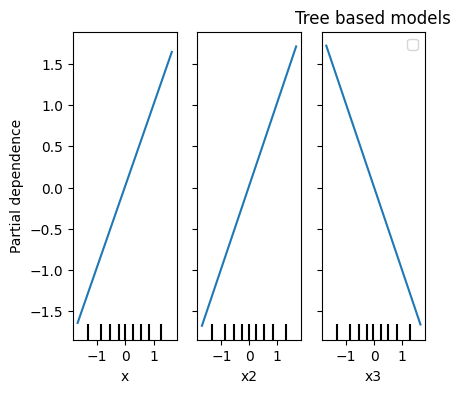

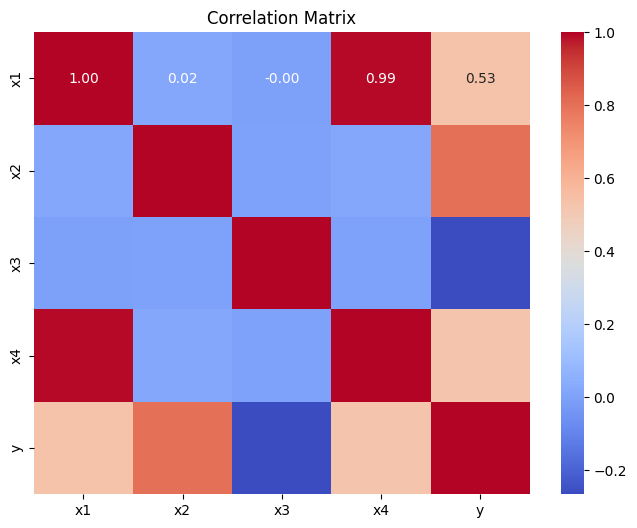

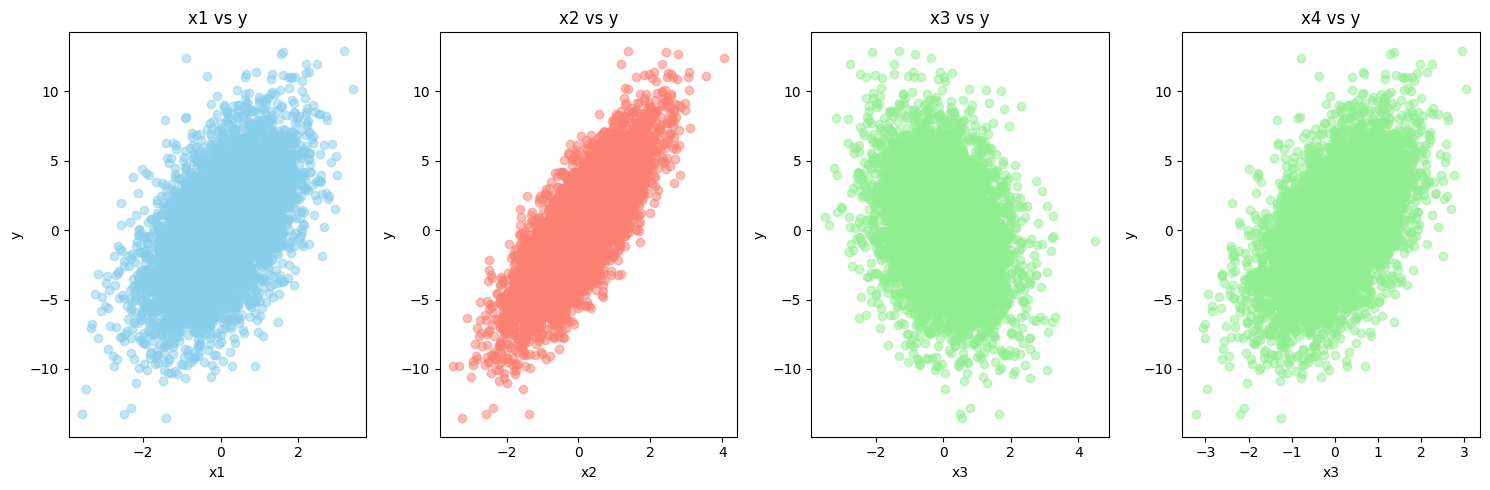

R-squared score: 0.9817
RMSE: 0.4991


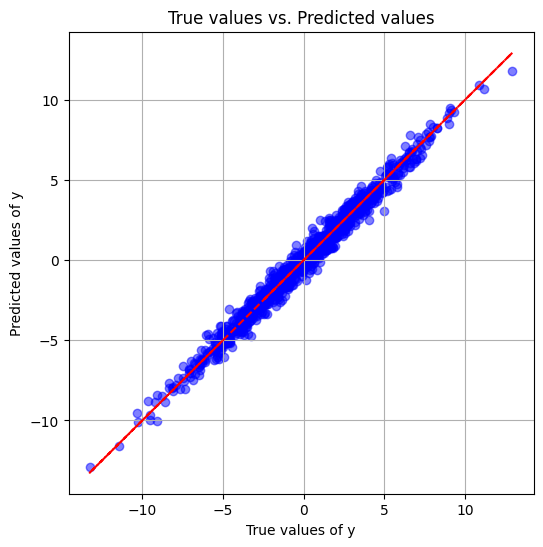

Text(0.5, 1.0, 'Tree based models')

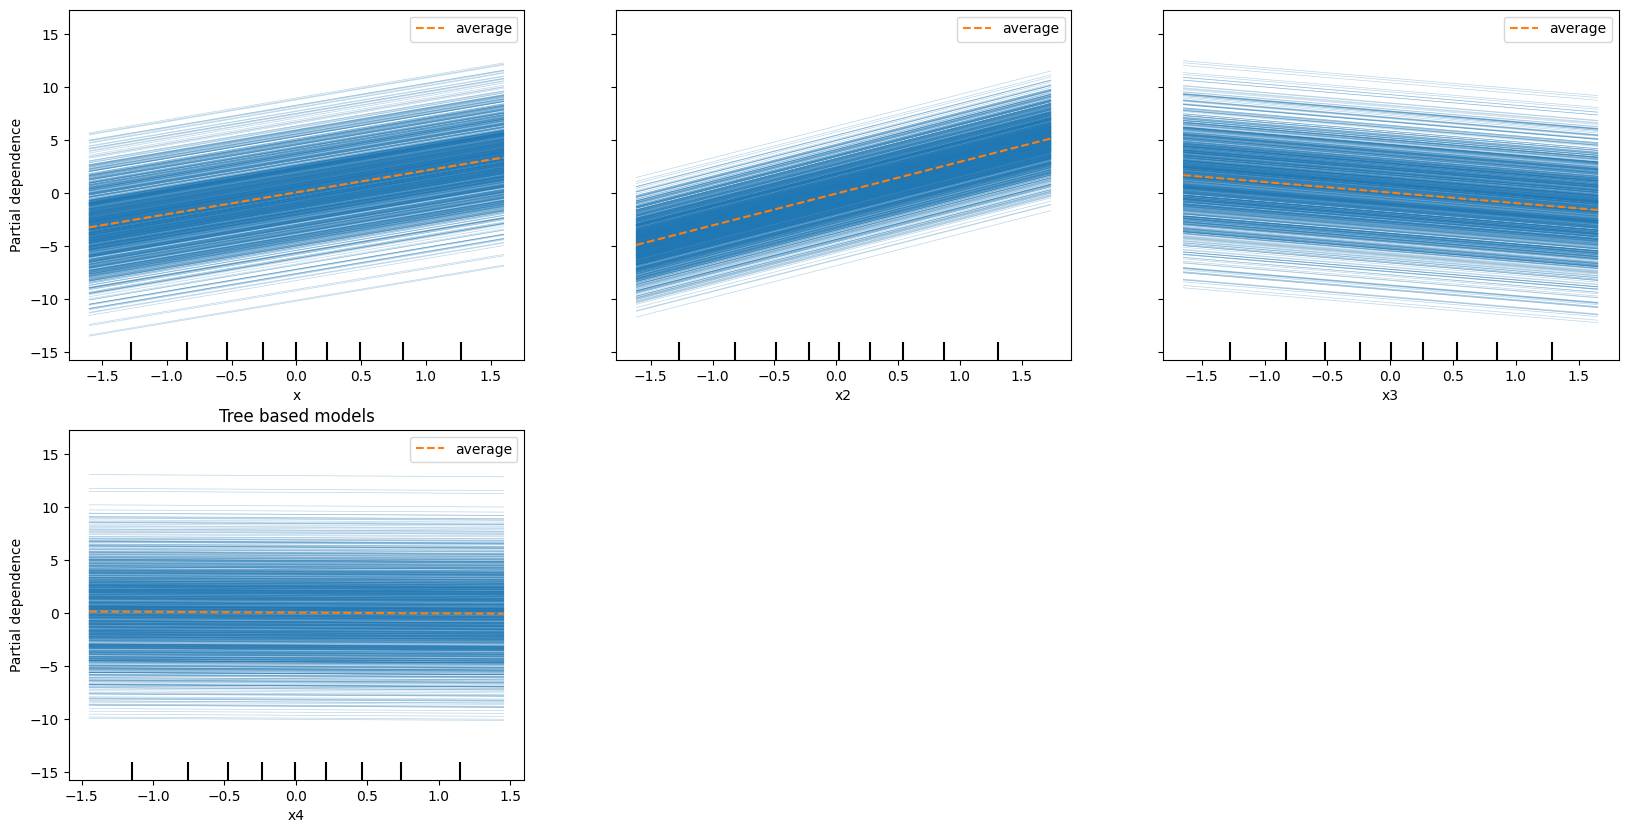

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
import lazypredict
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.linear_model._logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors._classification import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from pdpbox import pdp, get_dataset, info_plots
# Increase number of samples
num_samples = 5000

# Generating independent Gaussian random variables with mean 0 and variance 1
x1 = np.random.normal(loc=0, scale=1, size=num_samples)
x2 = np.random.normal(loc=0, scale=1, size=num_samples)
x3 = np.random.normal(loc=0, scale=1, size=num_samples)

# Generating y as a linear combination of x1, x2, and x3
y =  x1 + x2 - x3 + np.random.normal(loc=0, scale=0.5, size=num_samples)  # Adding some random noise

# Reshape the variables for fitting into the Linear Regression model
X = np.vstack((x1, x2, x3)).T  # Features matrix

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Linear Regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plotting predicted vs. real data
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(y_test, y_test, color='red', linestyle='--')  # Diagonal line for reference (perfect prediction)
plt.title('True values vs. Predicted values')
plt.xlabel('True values of y')
plt.ylabel('Predicted values of y')
plt.grid(True)
plt.show()

feature_importances = np.abs(model.coef_)

# Plotting feature importances
plt.figure(figsize=(6, 4))
plt.bar(range(len(feature_importances)), feature_importances, color='skyblue', edgecolor='black')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(range(len(feature_importances)), ['x1', 'x2', 'x3'])
plt.show()
# Plotting individual features against y
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x1, y, color='skyblue', alpha=0.5)
plt.title('x1 vs y')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.scatter(x2, y, color='salmon', alpha=0.5)
plt.title('x2 vs y')
plt.xlabel('x2')
plt.ylabel('y')

plt.subplot(1, 3, 3)
plt.scatter(x3, y, color='lightgreen', alpha=0.5)
plt.title('x3 vs y')
plt.xlabel('x3')
plt.ylabel('y')

plt.tight_layout()
plt.show()
# Creating subplots side by side


plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
ax = plt.subplot(1, 2, 1)  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=ax)

plt.legend()  # Show legend
plt.title('Tree based models')
import seaborn as sns
import pandas as pd
# Increase number of samples
num_samples = 5000

# Generating independent Gaussian random variables with mean 0 and variance 1
x1 = np.random.normal(loc=0, scale=1, size=num_samples)
x2 = np.random.normal(loc=0, scale=1, size=num_samples)
x3 = np.random.normal(loc=0, scale=1, size=num_samples)

# Generating y as a linear combination of x1, x2, and x3
y = 2 * x1 + 3 * x2 - x3 + np.random.normal(loc=0, scale=0.5, size=num_samples)  # Adding some random noise

# Create a new variable x4 highly correlated with x1
x4 = 0.9 * x1 + np.random.normal(loc=0, scale=0.1, size=num_samples)

# Create a DataFrame combining all variables
data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'y': y})

# Calculate and visualize the correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

# Plotting individual features against y
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.scatter(x1, y, color='skyblue', alpha=0.5)
plt.title('x1 vs y')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1, 4, 2)
plt.scatter(x2, y, color='salmon', alpha=0.5)
plt.title('x2 vs y')
plt.xlabel('x2')
plt.ylabel('y')

plt.subplot(1, 4, 3)
plt.scatter(x3, y, color='lightgreen', alpha=0.5)
plt.title('x3 vs y')
plt.xlabel('x3')
plt.ylabel('y')
plt.subplot(1, 4, 4)
plt.scatter(x4, y, color='lightgreen', alpha=0.5)
plt.title('x4 vs y')
plt.xlabel('x3')
plt.ylabel('y')
plt.tight_layout()
plt.show()
X = data[['x1', 'x2', 'x3', 'x4']]
y = data['y']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)

# Fitting the Linear Regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plotting predicted vs. real data
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(y_test, y_test, color='red', linestyle='--')  # Diagonal line for reference (perfect prediction)
plt.title('True values vs. Predicted values')
plt.xlabel('True values of y')
plt.ylabel('Predicted values of y')
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 10))
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(model, X_train, features=[0,1,2,3],feature_names=["x","x2","x3","x4"], ax=ax)

plt.legend()  # Show legend
plt.title('Tree based models')

<Axes: >

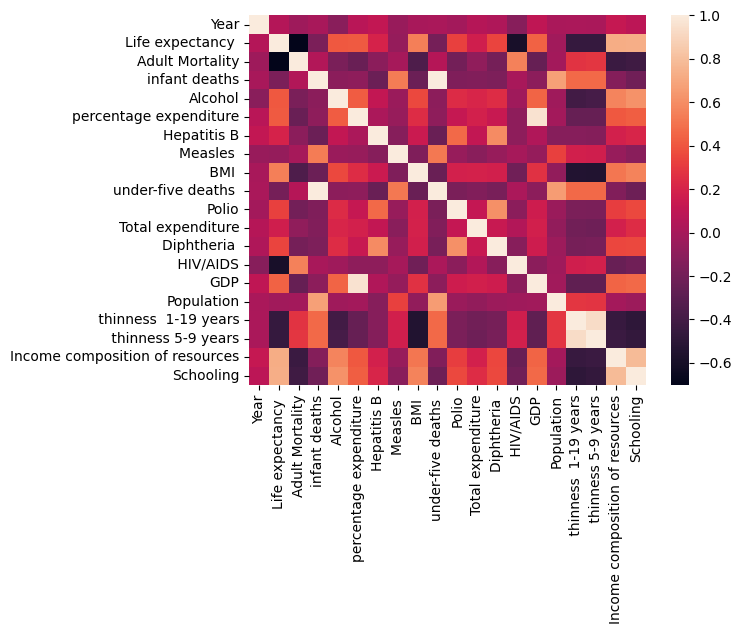

In [15]:
Life_Expectancy_Data = pd.read_csv("./datasets/life_expectancy.csv")
data = Life_Expectancy_Data.copy()
data = data.dropna()            # If there is a missing or empty observation, delete it. Or 'data.fillna(data.mean(), inplace=True)' with this make NaN values take mean

lindata = data.copy()
multidata = data.copy()
polydata = data.copy()
RFdata = data.copy()
logdata = data.copy()
# plot the heatmap
corr = lindata.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [16]:
# logdata.drop(["Country","percentage expenditure","infant deaths"], axis=1, inplace=True)  
logdata.drop(["Country"], axis=1, inplace=True)  
logdata.Status = [1 if each == "Developing" else 0 for each in logdata.Status]   
logdata.describe().T
y = logdata["Status"]
X_data = logdata.drop(["Status"], axis=1)
X = (X_data - np.min(X_data))/(np.max(X_data) - np.min(X_data)).values

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

loj = sm.Logit(y, X)
loj_model= loj.fit(method='lbfgs',maxiter=1000)
loj_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                 1649
Model:                          Logit   Df Residuals:                     1631
Method:                           MLE   Df Model:                           17
Date:                Sat, 02 Dec 2023   Pseudo R-squ.:                  0.6378
Time:                        11:27:44   Log-Likelihood:                -249.11
converged:                       True   LL-Null:                       -687.70
Covariance Type:            nonrobust   LLR p-value:                1.583e-175
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Year                                1.1776      0.453      2.601      0.009       0.290       2.065
Life expectancy                     4.0982      1.390      2.949      0.003       1.375       6.822
Adult Mortality                     8.9192      1.559      5.721      0.000       5.864      11.975
Alcohol                            -7.0201      0.732     -9.595      0.000      -8.454      -5.586
Hepatitis B                        -2.2629      0.544     -4.162      0.000      -3.329      -1.197
Measles                            -4.6812      8.505     -0.550      0.582     -21.350      11.988
 BMI                                0.7310      0.494      1.481      0.139      -0.236       1.698
under-five deaths                 723.1104    179.451      4.030      0.000     371.393    1074.828
Polio                               0.4162      0.753      0.553      0.580      -1.059       1.892
Total expenditure                   0.5383      0.643      0.838      0.402      -0.721       1.798
Diphtheria                          1.3803      0.763      1.809      0.070      -0.115       2.875
 HIV/AIDS                         696.8039    473.399      1.472      0.141    -231.041    1624.649
GDP                                -2.5933      1.094     -2.370      0.018      -4.738      -0.449
Population                        -13.7482     11.528     -1.193      0.233     -36.343       8.847
 thinness  1-19 years              21.4938      7.044      3.051      0.002       7.688      35.300
 thinness 5-9 years               -11.6495      6.484     -1.797      0.072     -24.357       1.058
Income composition of resources    -0.6917      1.340     -0.516      0.606      -3.318       1.935
Schooling                          -2.8166      1.498     -1.880      0.060      -5.753       0.119
===================================================================================================

Possibly complete quasi-separation: A fraction 0.46 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [13]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(penalty='none',solver='lbfgs',max_iter=1000)

# Fit the model
logreg.fit(X, y)

# Retrieve feature importance coefficients
coefficients = logreg.coef_[0]
# Create a DataFrame to display coefficients and corresponding feature names
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Display the table
display(coefficients_df)

,Feature,Coefficient
0,Year,2.19
1,Life expectancy,1.57
2,Adult Mortality,4.82
3,Alcohol,-5.91
4,Hepatitis B,-3.39
5,Measles,-3.22
6,BMI,-0.41
7,under-five deaths,615.09
8,Polio,-0.73
9,Total expenditure,-0.31


In [ ]:
HIV/AIDS	

In [ ]:
Conclusion
Along with linear depencies we have to further check for Non Linear depencies too. Although dependent variables do not create adverse effects while fitting the model but they can ruin our interpretations when we use technques like PDP/ICE.